#### Get started

In [2]:
# CLICK ME
from fastai.vision.all import *
from IPython.display import IFrame

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
path

Path('/storage/data/oxford-iiit-pet/images')

In [5]:
def is_cat(x): return x[0].isupper()

In [6]:
is_cat(["g"])

False

In [7]:
is_cat(["dOG", "cat"])

False

<a id="questions-explore" ><a>
## Questions to explore
    
- What is `DataLoaders`? [go](#dataloaders)
- What is `ImageDataLoaders`? Or How does it relate to `Dataloaders`? [go](#imagedataloaders)
- What are all the methods of `ImageDataLoaders` do? [go](#methods)
- What are commonly needed to build an `ImageDataLoaders`? [go](#common-parameters)
- What are needed uniquely by different methods to build an `ImageDataLoaders`? [go](#unique-parameters)
- What does `ImageDataLoaders.from_name_func` need uniquely to build an `ImageDataLoaders`? [go](#unique-param-name)
- Is it a modified version of a common way (`ImageDataLoaders.from_path_func`) of building `ImageDataLoaders`? [go](#modified)
- How difference is `cls.from_name_func` from `cls.from_path_func`? [go](#label_func)
- When do we use `cls.from_name_func` rather than `cls.from_path_func`? 
    - my guesses and questions [go](#when)
    - My exploration and answers to the question above? [go](#seek-found)
- One more question [go](#one-more)

<a id="dataloaders"><a>
### What is `DataLoaders`?

#### What does `DataLoader` do?

Google "Pytorch DataLoader", we got

> Why do we use DataLoader in PyTorch?

> Creating a PyTorch Dataset and managing it with Dataloader keeps your data manageable and helps to simplify your machine learning pipeline. a Dataset stores all your data, and **Dataloader is can be used to iterate through the data, manage batches, transform the data, and much more**.

[back](#questions-explore)

<a id="imagedataloaders"><a>
### What is `ImageDataLoaders`? Or how does it relate to `DataLoaders`?

#### What does `ImageDataLoaders` do?
- **What does it do?** 
    - using factory methods to wrap around `DataLoader` for computer vision problem

[back](#questions-explore)

<a id="methods"><a>
### What do all the methods of `ImageDataLoaders` created for?

#### `ImageDataLoader??` tell us all its methods source

In [8]:
ImageDataLoaders??

Init signature: ImageDataLoaders(*loaders, path='.', device=None)
Source:        
class ImageDataLoaders(DataLoaders):
    "Basic wrapper around several `DataLoader`s with factory methods for computer vision problems"
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_folder(cls, path, train='train', valid='valid', valid_pct=None, seed=None, vocab=None, item_tfms=None,
                    batch_tfms=None, **kwargs):
        "Create from imagenet style dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)"
        splitter = GrandparentSplitter(train_name=train, valid_name=valid) if valid_pct is None else RandomSplitter(valid_pct, seed=seed)
        get_items = get_image_files if valid_pct else partial(get_image_files, folders=[train, valid])
        dblock = DataBlock(blocks=(ImageBlock, CategoryBlock(vocab=vocab)),
                           get_items=get_items,
                           splitter=splitter,
                           get_y=p

[back](#questions-explore)

<a id="common-parameters"><a>
### What are commonly needed to build an `ImageDataLoaders`?

#### What are needed to build a `ImageDataLoader` regardless of its methods (ways of construction)?

- **What're those inputs accepted by most methods?**
    - `item_tfms`: one or several transforms applied to the items before batching them
    - `batch_tfms`: one or several transforms applied to the batches once they are formed
    - `bs`: the batch size
    - `val_bs`: the batch size for the validation DataLoader (defaults to bs)
    - `shuffle_train`: if we shuffle the training DataLoader or not
    - `device`: the PyTorch device to use (defaults to default_device())

In [9]:
IFrame("https://docs.fast.ai/vision.data#ImageDataLoaders", 900,500)

[back](#questions-explore)

<a id="unique-parameters"><a>
### What are needed uniquely by different methods to build an `ImageDataLoaders`?

#### Every method has many default parameters but ver few parameters requre user input 

In [10]:
ImageDataLoaders??

Init signature: ImageDataLoaders(*loaders, path='.', device=None)
Source:        
class ImageDataLoaders(DataLoaders):
    "Basic wrapper around several `DataLoader`s with factory methods for computer vision problems"
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_folder(cls, path, train='train', valid='valid', valid_pct=None, seed=None, vocab=None, item_tfms=None,
                    batch_tfms=None, **kwargs):
        "Create from imagenet style dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)"
        splitter = GrandparentSplitter(train_name=train, valid_name=valid) if valid_pct is None else RandomSplitter(valid_pct, seed=seed)
        get_items = get_image_files if valid_pct else partial(get_image_files, folders=[train, valid])
        dblock = DataBlock(blocks=(ImageBlock, CategoryBlock(vocab=vocab)),
                           get_items=get_items,
                           splitter=splitter,
                           get_y=p

[back](#questions-explore)

<a id="unique-param-name"><a>
### What does `ImageDataLoaders.from_name_func` need uniquely to build an `ImageDataLoaders`?

#### **What exactly does `from_name_func` do?**

- `from_name_func` just want to use **3 unique inputs** to define an `ImageDataLoader`, and **use default values for those common inputs** introduced above.

- In other words, `from_name_func` is **a wrapper around another way of building `ImageDataLoader`** while prioritize some inputs/parameters (encouraging user inputs) over others/parameters (using default values).

#### **What are the inputs unique to `from_name_func`?**
- `path`	(str, Path)		Set the default path to a directory that a Learner can use to save files like models
- `fnames`	(list)		A list of os.Pathlike's to individual image files
- `label_func`	(callable)		A function that receives a string (the file name) and outputs a label

In [11]:
IFrame("https://docs.fast.ai/vision.data#ImageDataLoaders.from_name_func", 900,500)

[back](#questions-explore)

<a id="modified"><a>
### Is it a modified version of a common way (`ImageDataLoaders.from_path_func`) of building `ImageDataLoaders`? 

#### `cls.from_name_func` is a wrapper around `cls.from_path_func` with `label_func` modified

In [12]:
ImageDataLoaders.from_name_func??

Signature:
ImageDataLoaders.from_name_func(
    path,
    fnames,
    label_func,
    valid_pct=0.2,
    seed=None,
    item_tfms=None,
    batch_tfms=None,
    bs=64,
    val_bs=None,
    shuffle=True,
    device=None,
)
Source:   
    @classmethod
    def from_name_func(cls, path, fnames, label_func, **kwargs):
        "Create from the name attrs of `fnames` in `path`s with `label_func`"
        if sys.platform == 'win32' and isinstance(label_func, types.LambdaType) and label_func.__name__ == '<lambda>':
            # https://medium.com/@jwnx/multiprocessing-serialization-in-python-with-pickle-9844f6fa1812
            raise ValueError("label_func couldn't be lambda function on Windows")
        f = using_attr(label_func, 'name')
        return cls.from_path_func(path, fnames, f, **kwargs)
File:      /opt/conda/lib/python3.7/site-packages/fastai/vision/data.py
Type:      method


[back](#questions-explore)

<a id="label_func"><a>
### How difference is `cls.from_name_func` from `cls.from_path_func`?

#### All and only difference lies in `label_func`

```python
f = using_attr(label_func, 'name')
return cls.from_path_func(path, fnames, f, **kwargs)
```

- `from_path_func`: Create from list of `fnames` in `path`s with `label_func`
- `from_name_func`: Create from the name attrs of `fnames` in `path`s with `label_func`

[back](#questions-explore)

<a id="when"><a>
### When do we use `cls.from_name_func` rather than `cls.from_path_func`? 

#### My guesses
- Do we use `clas.from_name_func` when it is a binary classification?
- `f(fnames[0])` returns either True (for cat) or False (for dog)?
- Somehow, PETS dataset has such naming rules that if cat use upper case and dog for lower case?

#### My questions
- What is the `name` attr of a filename in PETS dataset?
- Given `is_cat` as a function to detect Capital letters, how can it read a filename's name attr and return True (for cat) and False (for dog)?

[back](#questions-explore)

<a id="seek-found"><a>
#### My exploration and answers
- Is `from_name_func` only for binary classification?
    - Of course not. 
    - `is_cat` makes it a binary classification
    - you can use a different `label_func` in `cls.from_name_func` for multiple class classification
- When to use `from_name_func`?
    - Whether to use `from_name_func` or `from_path_func` depends on the format of filenames. 
    - In this case, the labels are stored inside the name attr of PETS dataset filenames
    - `from_name_func` allows us to easily get the name attr of the filenames
    - We just need to create a `label_func` to turn the name attr into (or return) a label 
- What is the name attr of a filename? 
    - a filename looks like "Path('/storage/data/oxford-iiit-pet/images/saint_bernard_1.jpg')"
    - the name attr is the last bit of the filename, such as 'saint_bernard_1.jpg'
- What exactly does `is_cat` do to the name attr of a filename? 
    - It takes the first letter of the name attr
    - and detect whether it is upper or lower case
    - if upper, return True, otherwise False
- How does all these above determine a filename referring to a cat or a dog?
    - It requires the name attr of a dog filename to have the first letter lower case
    - and the first letter of the name attr of a cat filename to be upper case

In [13]:
def is_cat(x): return x[0].isupper()

In [14]:
def return_name(x): return x

In [15]:
def return_firstLetter(x): return x[0]

In [16]:
using_attr?

Signature: using_attr(f, attr)
Docstring: Construct a function which applies `f` to the argument's attribute `attr`
File:      ~/.local/lib/python3.7/site-packages/fastcore/basics.py
Type:      function


In [17]:
get_image_files(path)[6000]

Path('/storage/data/oxford-iiit-pet/images/saint_bernard_1.jpg')

In [18]:
label_func = return_name
f = using_attr(label_func, 'name')
f(get_image_files(path)[6000]) # to return the name attr of the filename of the image

'saint_bernard_1.jpg'

In [19]:
label_func = return_firstLetter
f = using_attr(label_func, 'name')
f(get_image_files(path)[6000]) # to return the name attr of the filename of the image

's'

In [20]:
label_func = is_cat
f = using_attr(label_func, 'name')
f(get_image_files(path)[6000]) # to return True if the name attr is Capital letters

False

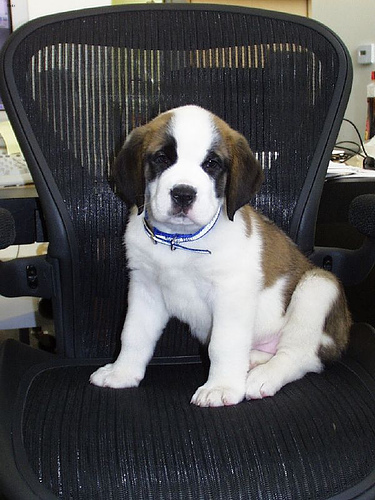

In [21]:
PILImage.create(get_image_files(path)[6000])

In [22]:
label_func = return_name
f = using_attr(label_func, 'name')
f(get_image_files(path)[1000]) # to return the name attr of the filename of the image

'Egyptian_Mau_1.jpg'

In [23]:
label_func = return_firstLetter
f = using_attr(label_func, 'name')
f(get_image_files(path)[1000]) # to return the name attr of the filename of the image

'E'

In [24]:
label_func = is_cat
f = using_attr(label_func, 'name')
f(get_image_files(path)[1000]) # to return True if the name attr is Capital letters

True

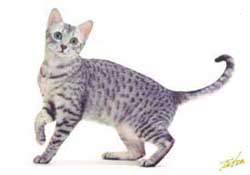

In [25]:
PILImage.create(get_image_files(path)[1000])

In [26]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

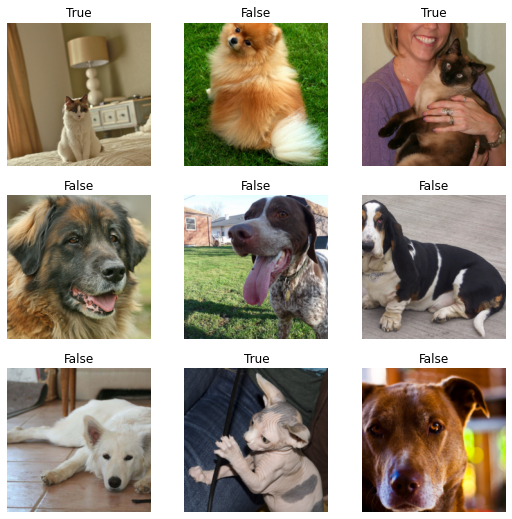

In [27]:
dls.show_batch()

In [28]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=return_name, item_tfms=Resize(224))

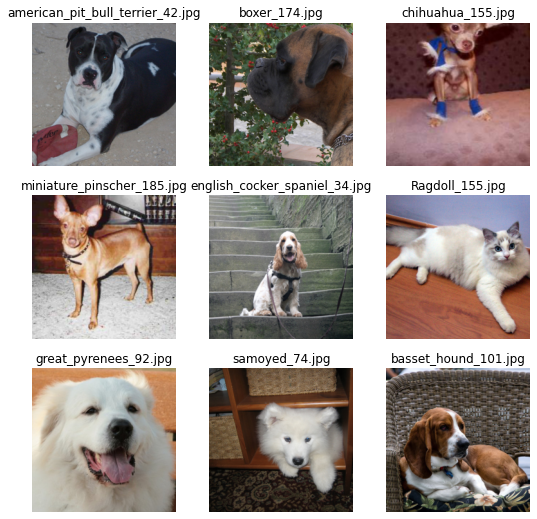

In [29]:
dls.show_batch()

so, it's up to the `label_func` to determine what is the label, and to remove the `_number.jpg` we can use regex next time

[back](#questions-explore)

<a id="#one-more"><a>
#### One more question? 
However, I have not found anything online introducing this name attr 'secret' of this PETS dataset. How do you or Jeremy come to know about this? 